### Load library
menggunakan linear regression

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Load datasets

In [68]:
df = pd.read_csv('caesarian_new.csv', usecols=['age', 'Delivery number', 'Delivery time', 'clood of pressure', 'heart problem','caesarian'])

### Sneak peak data

In [69]:
df.head()

,age,Delivery number,Delivery time,clood of pressure,heart problem,caesarian
0,1,0,2,0,0,NaN
1,2,0,1,0,1,NaN
2,2,1,1,0,0,NaN
3,1,0,2,0,0,NaN
4,2,0,1,0,1,NaN


In [70]:
df.shape

(80, 6)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                80 non-null     int64  
 1   Delivery number    80 non-null     int64  
 2   Delivery time      80 non-null     int64  
 3   clood of pressure  80 non-null     int64  
 4   heart problem      80 non-null     int64  
 5   caesarian          0 non-null      float64
dtypes: float64(1), int64(5)
memory usage: 3.9 KB


In [72]:
df.describe()

,age,Delivery number,Delivery time,clood of pressure,heart problem,caesarian
count,80.000000,80.000000,80.000000,80.000000,80.000000,0.0
mean,1.662500,0.637500,1.000000,0.375000,0.575000,NaN
std,0.794662,0.815107,0.711568,0.487177,0.497462,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,1.000000,0.000000,0.750000,0.000000,0.000000,NaN
50%,1.000000,0.000000,1.000000,0.000000,1.000000,NaN
75%,2.000000,1.000000,1.250000,1.000000,1.000000,NaN
max,4.000000,2.000000,2.000000,1.000000,1.000000,NaN


### Handling Missing Values

In [73]:
df.isnull().sum()

age                   0
Delivery number       0
Delivery time         0
clood of pressure     0
heart problem         0
caesarian            80
dtype: int64

### Exploratory Data Analysis (EDA)

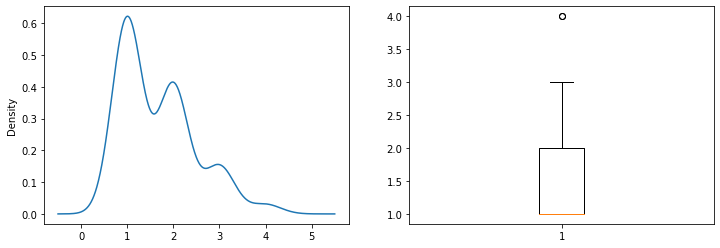

In [74]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['age'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['age'])
plt.show()

- Dapat dilihat bahwa density dari horsepower paling tinggi di nilai 0.6.
- Distribusinya hampir mirip dengan distribusi normal namun persebaran data kurang merata (memiliki standard deviasi yang tinggi).

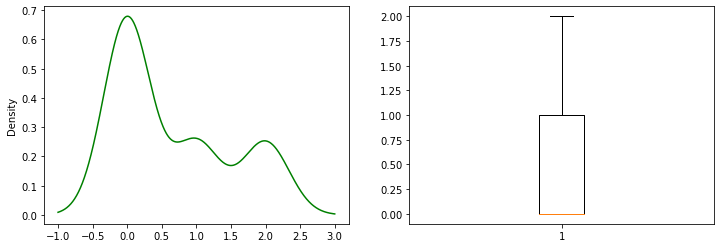

In [75]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['Delivery number'].plot(kind='kde', c='g')

f.add_subplot(1,2,2)
plt.boxplot(df['Delivery number'])
plt.show()

- Density dari Delivery number paling tinggi hampir mencapai 0.7.
- Distribusinya hampir mirip dengan distribusi normal namun persebaran data kurang merata (memiliki standard deviasi yang tinggi).

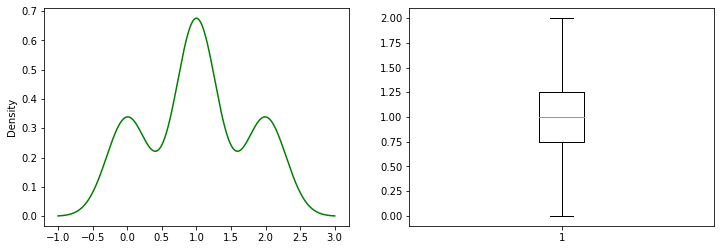

In [76]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['Delivery time'].plot(kind='kde', c='g')

f.add_subplot(1,2,2)
plt.boxplot(df['Delivery time'])
plt.show()

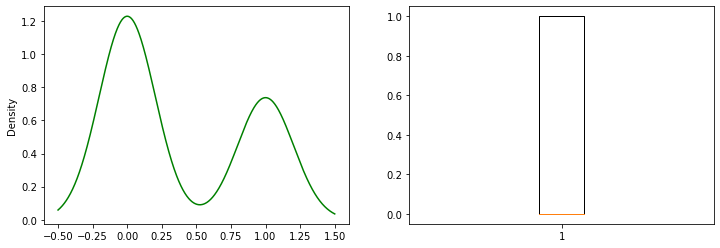

In [77]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['clood of pressure'].plot(kind='kde', c='g')

f.add_subplot(1,2,2)
plt.boxplot(df['clood of pressure'])
plt.show()

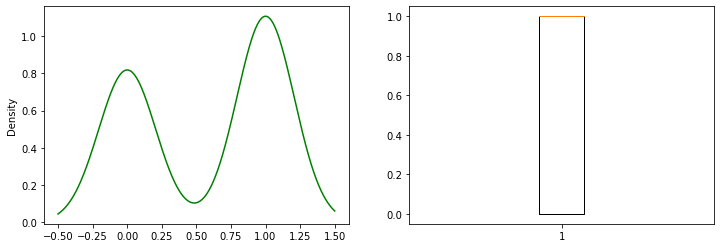

In [78]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['heart problem'].plot(kind='kde', c='g')

f.add_subplot(1,2,2)
plt.boxplot(df['heart problem'])
plt.show()

In [83]:
df.corr()

,age,Delivery number,Delivery time,clood of pressure,heart problem,caesarian
age,1.000000,-0.074017,0.134315,0.200267,0.144894,NaN
Delivery number,-0.074017,1.000000,-0.087298,-0.003985,-0.166233,NaN
Delivery time,0.134315,-0.087298,1.000000,0.036515,-0.035760,NaN
clood of pressure,0.200267,-0.003985,0.036515,1.000000,0.352557,NaN
heart problem,0.144894,-0.166233,-0.035760,0.352557,1.000000,NaN
caesarian,NaN,NaN,NaN,NaN,NaN,NaN


- Setelah kita tahu tentang karakteristik data kita, bisa dilanjutkan ke tahap modelling

### Modelling

In [84]:
df.head()

,age,Delivery number,Delivery time,clood of pressure,heart problem,caesarian
0,1,0,2,0,0,NaN
1,2,0,1,0,1,NaN
2,2,1,1,0,0,NaN
3,1,0,2,0,0,NaN
4,2,0,1,0,1,NaN


In [56]:
x = df['age'].values.reshape(-1,1)
y = df['heart problem'].values.reshape(-1,1)

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [58]:
lin_reg = LinearRegression()

In [59]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [60]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[0.09858074]]
[0.44764097]


- dari nilai m dan b diatas, kalau dimasukan ke dalam rumus menjadi:
Y = 0.0544052x - 0.49939099

In [61]:
lin_reg.score(x_test, y_test)

-0.12023141533758053

- Model kita mendapatkan accuracy score sebesar 78.68%

Text(0.5, 1.0, 'age vs heart problem')

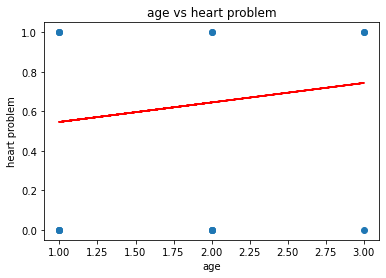

In [62]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('age')
plt.ylabel('heart problem')
plt.title('age vs heart problem')

### Prediction
- selanjutnya prediksi 

In [63]:
lin_reg.predict([[100]])

array([[10.30571538]])

In [64]:
lin_reg.predict([[150]])

array([[15.23475259]])

In [65]:
lin_reg.predict([[200]])

array([[20.1637898]])